## Pakistan Used Cars
This data was primarily collected for research purposes. The data is regarding the used cars and their prices in Pakistan. It was scrapped from different car selling websites. Feel free to play around and come up with some eye catching Kernels.

For more infomation click [here](https://www.kaggle.com/karimali/used-cars-data-pakistan)

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv("./OLX_Car_Data_CSV.csv")

In [2]:
data.head(20)

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0
5,Toyota,Used,Petrol,80000.0,Corrolla Altis,1620000,Karachi,Cash,2012.0
6,Suzuki,New,CNG,65000.0,Cultus VXL,450000,Karachi,Cash,2006.0
7,Toyota,New,Petrol,10241.0,Corrolla Altis,2900000,Karachi,Cash,2017.0
8,Suzuki,Used,CNG,83000.0,Alto,490000,Karachi,Cash,2009.0
9,Honda,Used,Petrol,1.0,Civic VTi,480000,Karachi,Cash,1997.0


In [3]:
data.dropna(how="any", axis=0, inplace=True)

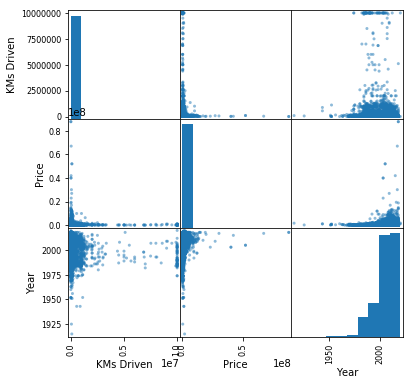

In [4]:
%matplotlib inline
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

_ = scatter_matrix(data, figsize=(6,6))
plt.show()

The data seems dense, so i apply the log and exp transform

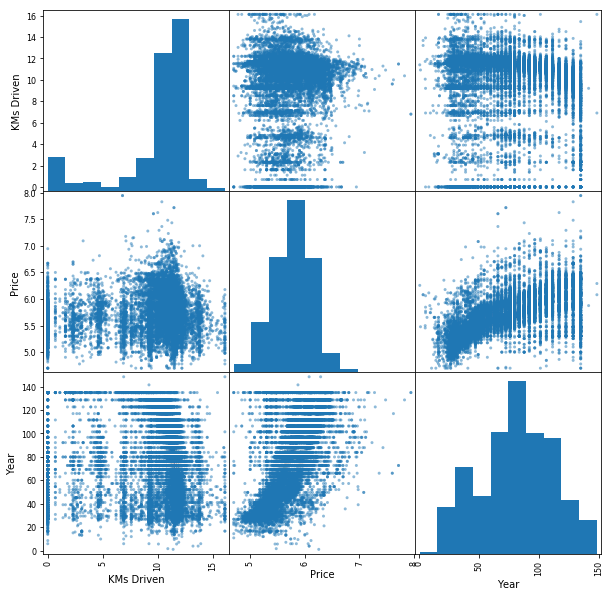

In [5]:
copy = data.copy()
copy["KMs Driven"] = copy["KMs Driven"].apply(np.log)
copy["Price"] = copy["Price"].apply(np.log10)
copy["Year"] = (copy["Year"]-min(copy["Year"]))/(max(copy["Year"])-min(copy["Year"]))
copy["Year"] = copy["Year"].apply(lambda x: np.e**(5*x))

_ = scatter_matrix(copy, figsize=(10,10))
plt.show()

- For the discrete variables, i make it dummy for the next classfication model
- I choose to cut the continous variables into serveral intervals

In [14]:
dummy = pd.get_dummies(data[["Brand", "Condition", "Fuel", "Model", "Registered City", "Transaction Type"]])

year = pd.get_dummies(pd.cut(copy["Year"], 100))
price = pd.get_dummies(pd.cut(copy["Price"], 100))
KMs = pd.get_dummies(pd.cut(copy["KMs Driven"], 100))

year.columns = list(map(lambda x: "Year_" + str(x), year.columns))
price.columns = list(map(lambda x: "price_" + str(x), price.columns))
KMs.columns = list(map(lambda x: "KMs_" + str(x), KMs.columns))

In [15]:
new_data = pd.concat(objs=[year, price, KMs, dummy], axis=1)

In [16]:
new_data.head()

,"Year_(0.853, 2.474]","Year_(2.474, 3.948]","Year_(3.948, 5.422]","Year_(5.422, 6.897]","Year_(6.897, 8.371]","Year_(8.371, 9.845]","Year_(9.845, 11.319]","Year_(11.319, 12.793]","Year_(12.793, 14.267]","Year_(14.267, 15.741]",...,Registered City_Sialkot,Registered City_Sukkar,Registered City_Sukkur,Registered City_Swabi,Registered City_Swat,Registered City_Tank,Registered City_Vehari,Registered City_Wah,Transaction Type_Cash,Transaction Type_Installment/Leasing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


- Now i'm gonna to bulid the classification model with LR and RF. What i predict is whether the car is used.
- Since the dataset do not have a balance target, i choose the ROC curve and ROC_AUC score for scoring

In [17]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB

def train(est, grid_cv=False):
    X = new_data.drop(columns=['Condition_New', 'Condition_Used'])
    y = data["Condition"].replace({"Used":0,"New":1})
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=500,random_state=42)
    
    est.fit(X_train, y_train)
    fpr, tpr, _ = roc_curve(y_test, est.predict_proba(X_test)[:, 1])
    roc_score = roc_auc_score(y_test, est.predict_proba(X_test)[:,1])
    
    if not grid_cv:
        result = cross_validate(est, X, y, cv=10)
        _ = plt.figure(figsize=(8, 4))
        _ = plt.subplot(121)
        _ = plt.plot(result["test_score"], 'ro-', label='test_score')
        _ = plt.plot(result["train_score"], 'ko-', label="train_score")
        _ = plt.legend()
                                  
        _ = plt.subplot(122)

    
    _ = plt.plot(fpr, tpr, 'r--', label="roc_score: %.2f" % roc_score)
    _ = plt.plot([0,1], [0,1], 'k--') 
    _ = plt.legend()
    plt.show()
    print(confusion_matrix(y_test, est.predict(X_test)))
    
    if grid_cv:
        print(est.best_params_)

In [10]:
# lr_cv = GridSearchCV(LogisticRegression(), cv=10)
rf_cv = GridSearchCV(RandomForestClassifier(), cv=10, 
                     param_grid={'n_estimators': [10,20,30,50,100,200], 
                                 'max_depth': [5, 10, 30, 50]})

lr = LogisticRegression()
rf = RandomForestClassifier(max_depth=60, n_estimators=100, )

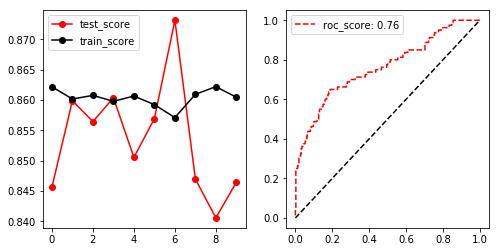

[[415   5]
 [ 60  20]]


In [18]:
train(lr)

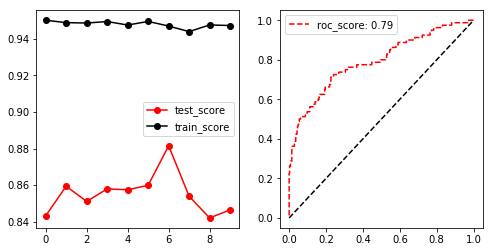

[[416   4]
 [ 57  23]]


In [19]:
train(rf)

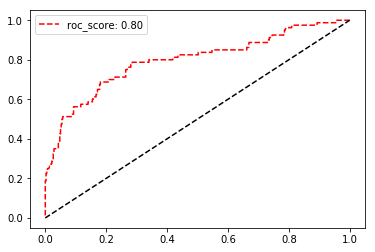

[[411   9]
 [ 57  23]]
{'max_depth': 50, 'n_estimators': 200}


In [13]:
train(rf_cv, grid_cv=True)